In [40]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pylab
#import veikoscripts as vs
from ggplot import *
from decimal import *
from altair import *
from datetime import datetime, timedelta

In [42]:
#pd.set_option('display.float_format', '{:.2E}'.format)
natokas = pd.read_csv('NATO_Test_tulemused.csv', header=0, sep=',', na_values='#VALUE!', na_filter=True)
breaks_years = [2016, 2017, 2018, 2019, 2020]
labels_years = ["2016", "2017", "2018", "2019", "2020"]

In [43]:
##Funktsioon leitud siit (http://andrewgaidus.com/Analyzing_Race_Results_Part_1_Web_Scraping/), et muuta jooksuajad
##pandasele söödavaks
def convert_date_string_to_datetime(time_string):
    t=datetime.strptime(time_string, "%H:%M:%S")
    delta = timedelta(minutes=t.minute, seconds=t.second)
    return delta

##Muutab tund:minutid:sekundid minutiteks. Parem joonisele kanda
natokas['jooksuaeg'] = natokas['Jooks'].apply(convert_date_string_to_datetime)
natokas['Minutes'] = natokas['jooksuaeg'].dt.seconds/60

# Kätekõverdused

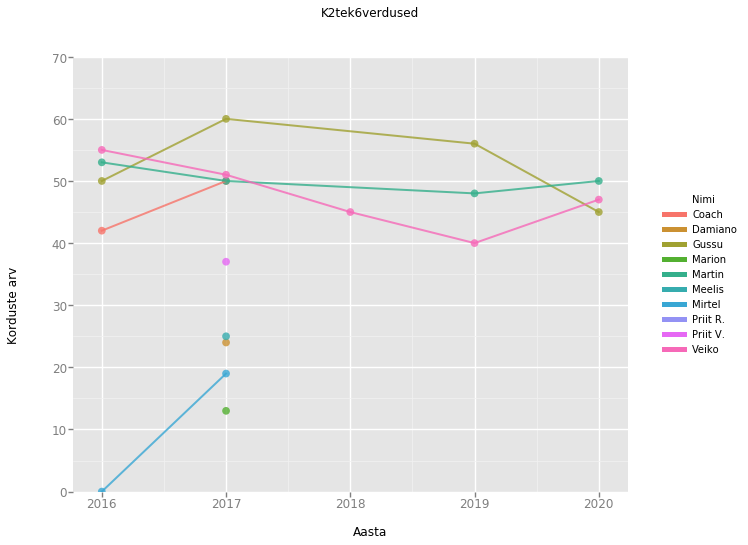

<ggplot: (8749953944641)>


In [44]:
katekad = ggplot(natokas, aes('Aasta',  'K2tek6verdused', color='Nimi')) + geom_point(size=60, alpha=0.8) +\
    geom_line(size=2, alpha=0.8) +\
    ylim(0,70) + ggtitle('K2tek6verdused') + ylab('Korduste arv') +\
    scale_x_continuous(breaks=breaks_years,labels=labels_years)
print katekad

# Kõhulihased

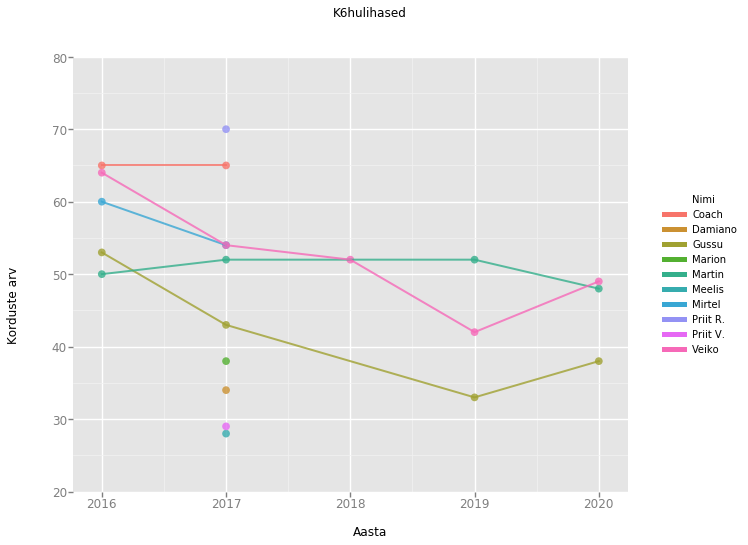

<ggplot: (8749954354037)>


In [45]:
kohukad = ggplot(natokas, aes('Aasta',  'K6hulihased', color='Nimi')) + geom_point(size=60, alpha=0.8) +\
    geom_line(size=2, alpha=0.8) +\
    ylim(20,80) + ggtitle('K6hulihased') + ylab('Korduste arv') +\
    scale_x_continuous(breaks=breaks_years,labels=labels_years)
print kohukad

# 3,2 km jooks

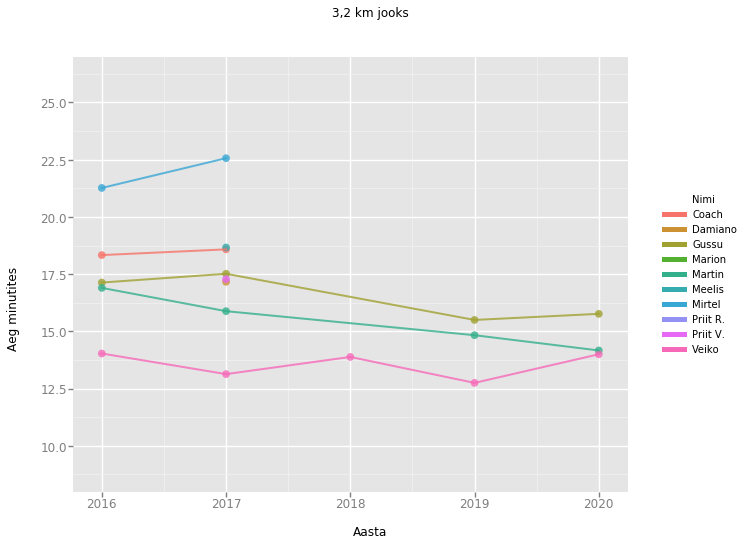

<ggplot: (8749954337517)>


In [46]:
jooks = ggplot(natokas, aes('Aasta',  'Minutes', color='Nimi')) + geom_point(size=60, alpha=0.8) +\
    geom_line(size=2, alpha=0.8) +\
    ylim(25,0) + ggtitle('3,2 km jooks') + ylab('Aeg minutites') +\
    scale_y_continuous( limits=(8,27)) + scale_x_continuous(breaks=breaks_years,labels=labels_years)
print jooks

# Kogu puntkisumma

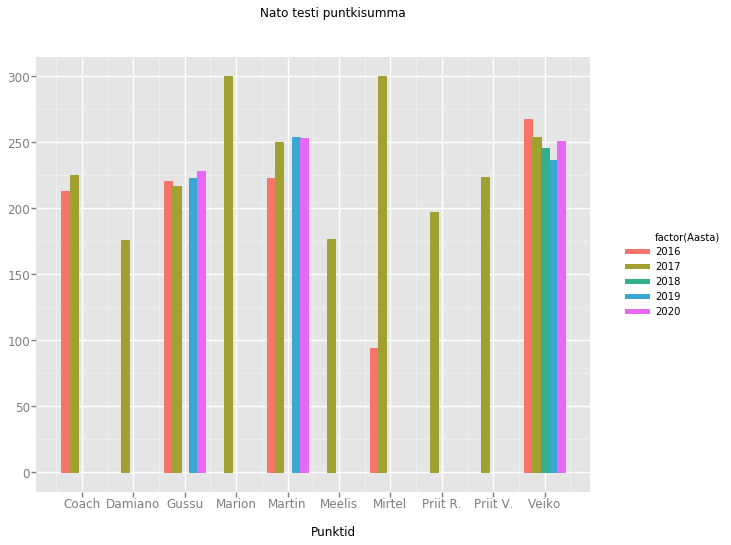

<ggplot: (8749953659417)>


In [47]:
summa = ggplot(natokas, aes(x='Nimi', fill='factor(Aasta)', weight='Punktide_summa')) + geom_bar() +\
    ggtitle('Nato testi puntkisumma') + xlab('Punktid')
print summa